In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV # separate dataset into train and test
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, VarianceThreshold
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pickle

In [9]:
df = pd.read_csv("/Users/rohitpaul/Documents/Projects/House Price Prediction/data/House Data.csv")

In [10]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No alley access,Reg,Lvl,...,No Pool,No Fence,No Feature,0,2,2008,WD,Normal,208500,12.247694
1,1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No alley access,Reg,Lvl,...,No Pool,No Fence,No Feature,0,5,2007,WD,Normal,181500,12.109011
2,2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No alley access,IR1,Lvl,...,No Pool,No Fence,No Feature,0,9,2008,WD,Normal,223500,12.317167
3,3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No alley access,IR1,Lvl,...,No Pool,No Fence,No Feature,0,2,2006,WD,Abnorml,140000,11.849398
4,4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No alley access,IR1,Lvl,...,No Pool,No Fence,No Feature,0,12,2008,WD,Normal,250000,12.429216


In [11]:
df.shape

(1460, 83)

In [12]:
df = df.drop(["Unnamed: 0", "SalePrice_log"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [14]:
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'],errors='coerce')

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Observation
There are no missing values

In [16]:
df.duplicated().sum()

0

## Observation
There are no duplicates values in the dataset

In [17]:
num_variables = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_variables = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of numerical variables: ', len(num_variables))
print('Number of Categorical variables: ', len(cat_variables))

Number of numerical variables:  35
Number of Categorical variables:  46


# Observation
There are 36 numerical features and 46 Categorical features

In [18]:
df[num_variables].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
df[cat_variables].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,No Feature,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal


In [20]:
year_feature = [feature for feature in num_variables if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [22]:
discrete_feature=[feature for feature in num_variables if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Number of Discrete Variables: {}".format(len(discrete_feature)))

Number of Discrete Variables: 14


In [23]:
df[discrete_feature].head()

,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [24]:
continuous_feature=[feature for feature in num_variables if feature not in discrete_feature+year_feature+['Id']]
print("Number of Continuous feature: {}".format(len(continuous_feature)))

Number of Continuous feature: 16


In [25]:
df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


# Data Visualization

<AxesSubplot: >

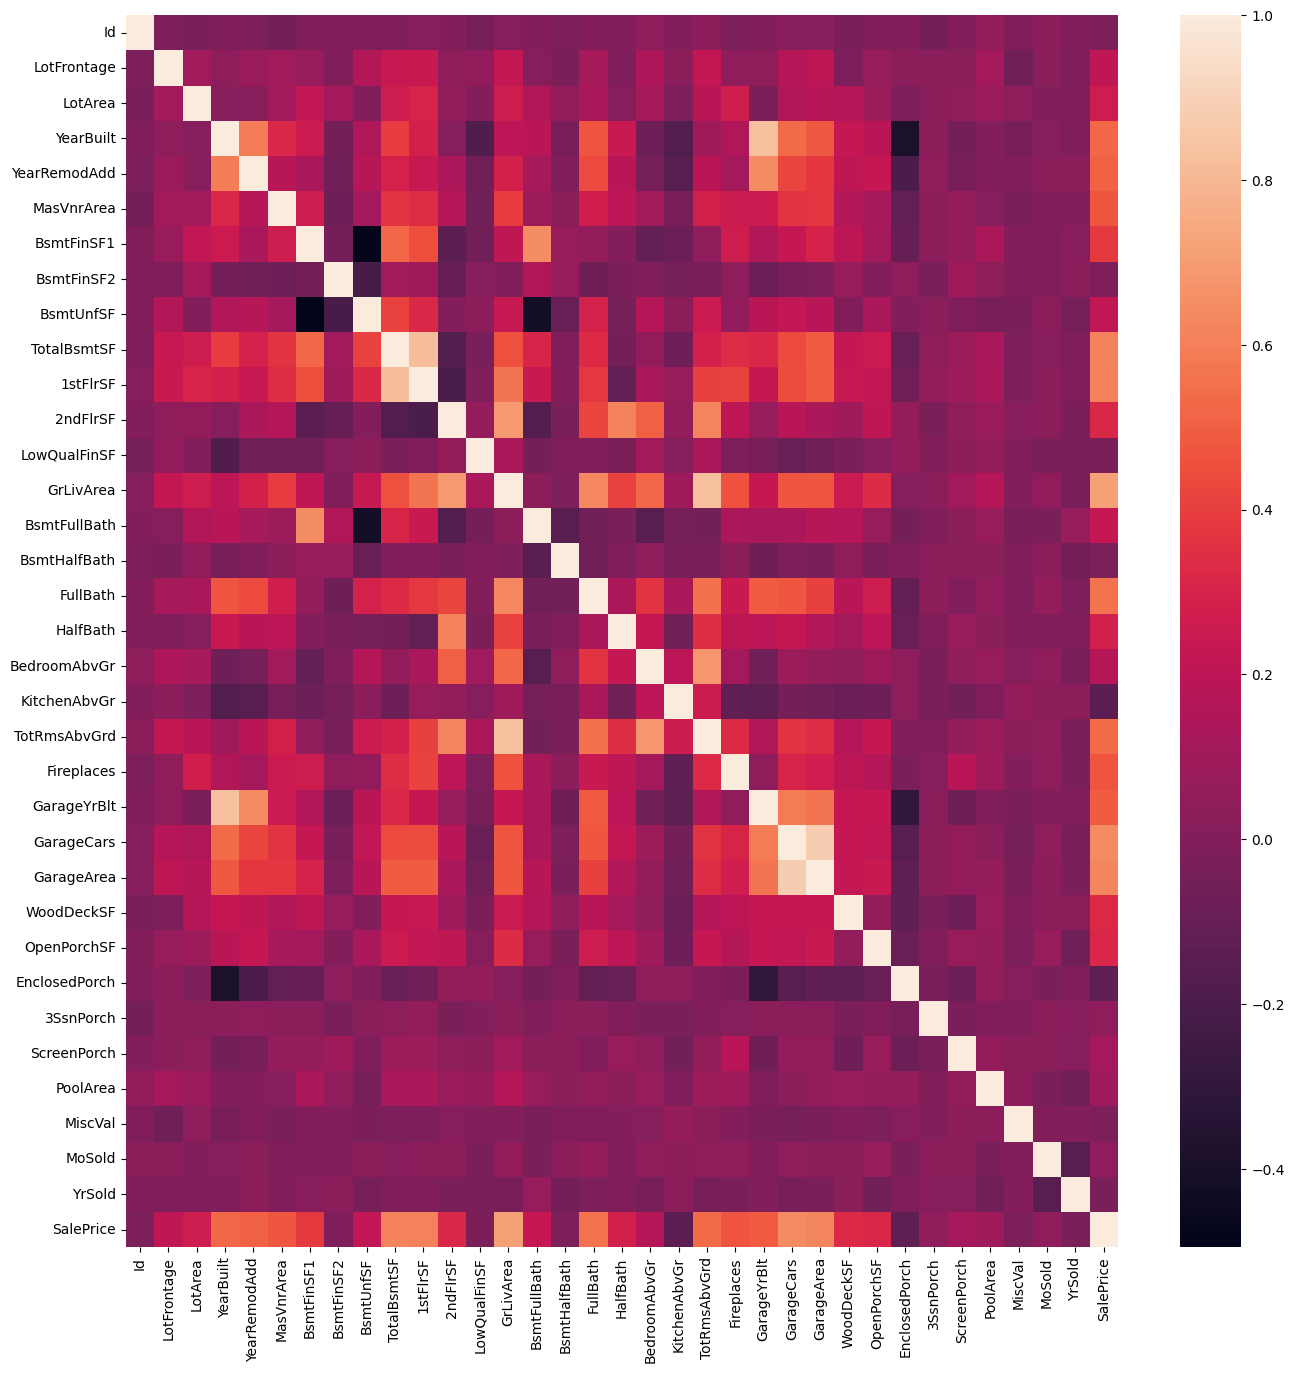

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

<AxesSubplot: >

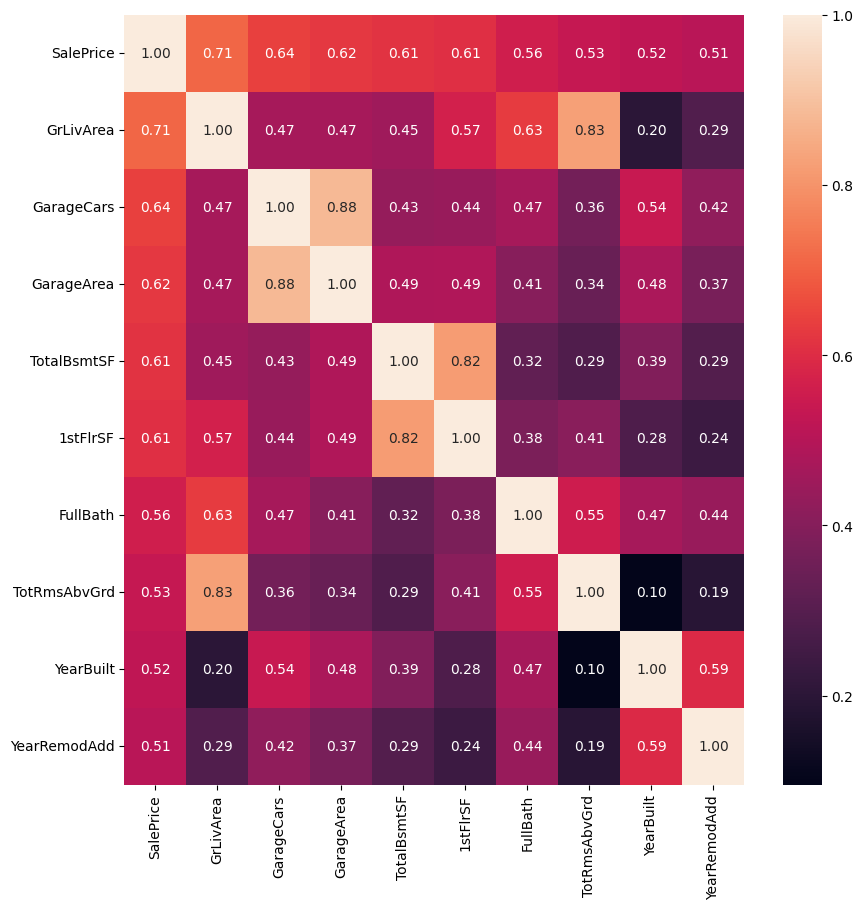

In [27]:
# List top 10 feature that correlated to saleprice
plt.figure(figsize=(10,10))
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
corr = np.corrcoef(df[cols].values.T)
sns.heatmap(corr, cbar=True, annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

# Insight 
Using this heatmap we can see top 10 features correlated to SalePrice

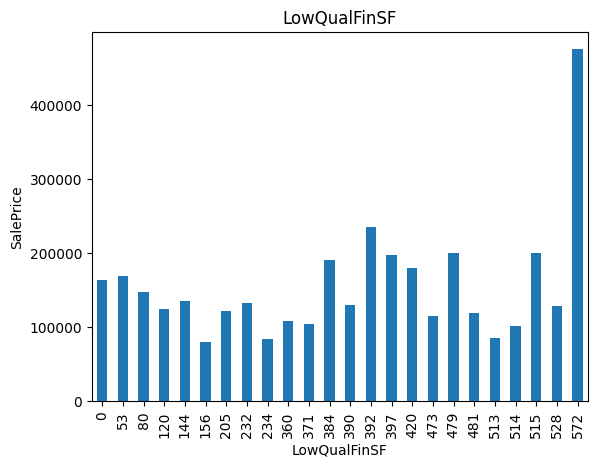

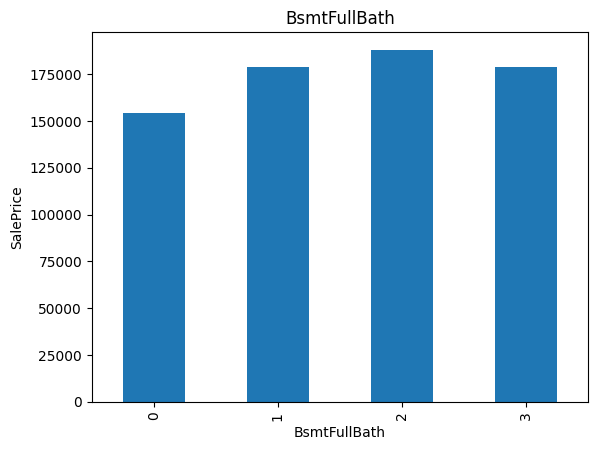

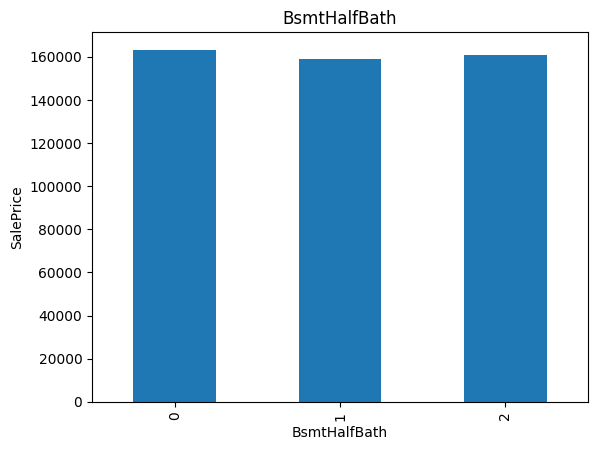

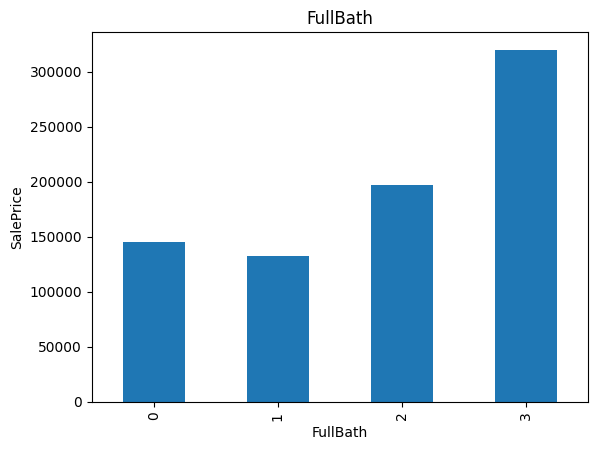

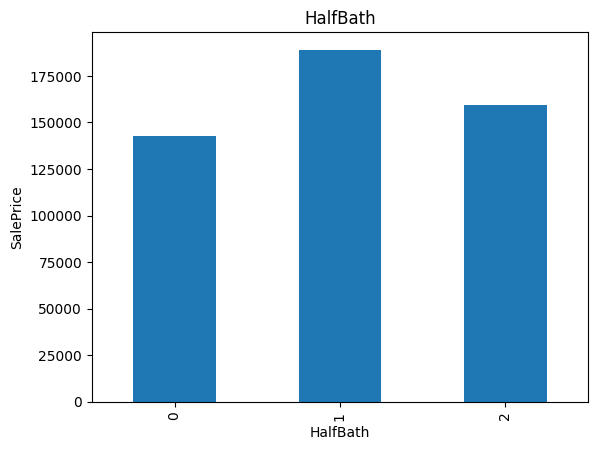

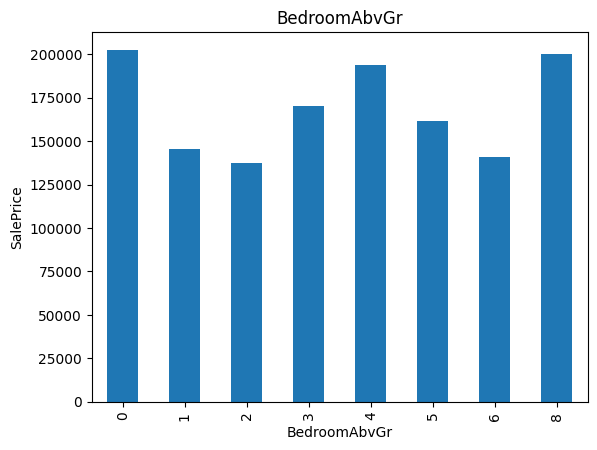

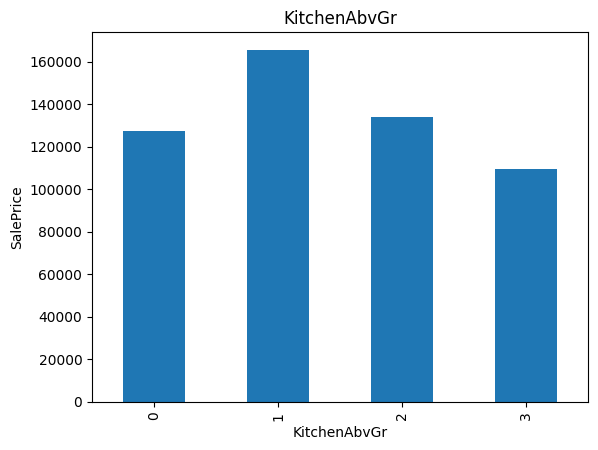

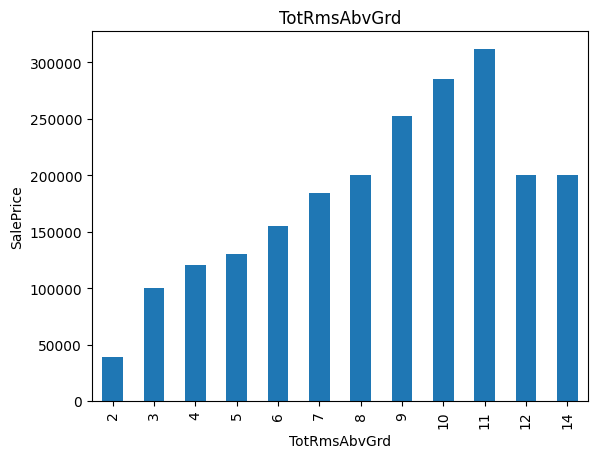

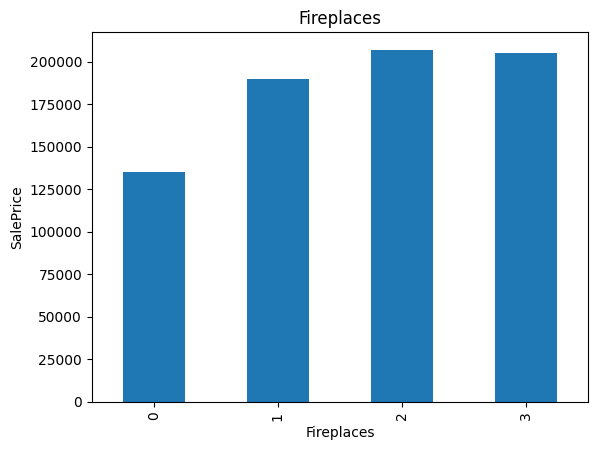

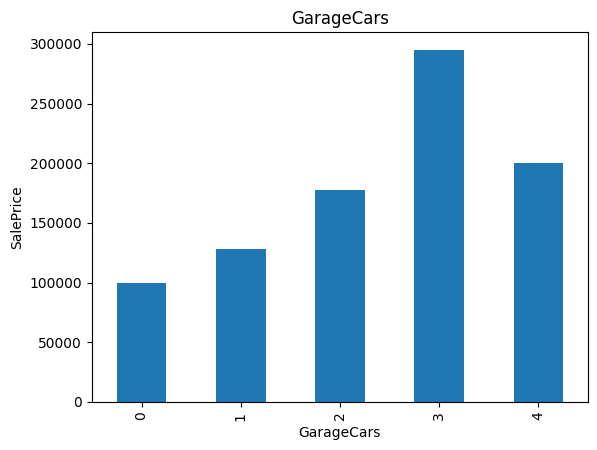

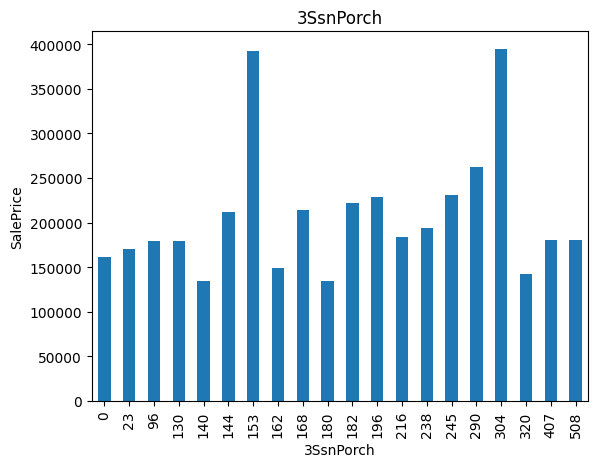

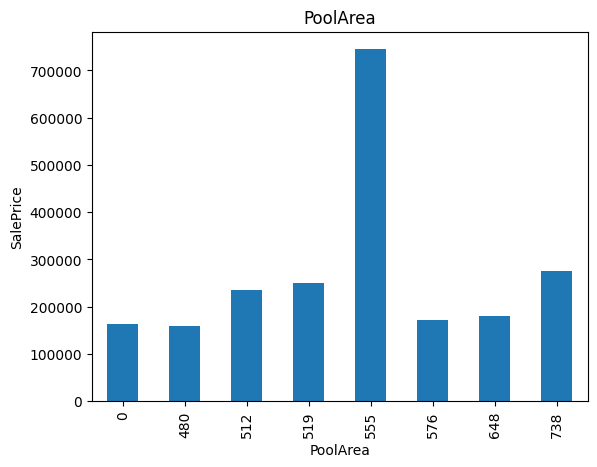

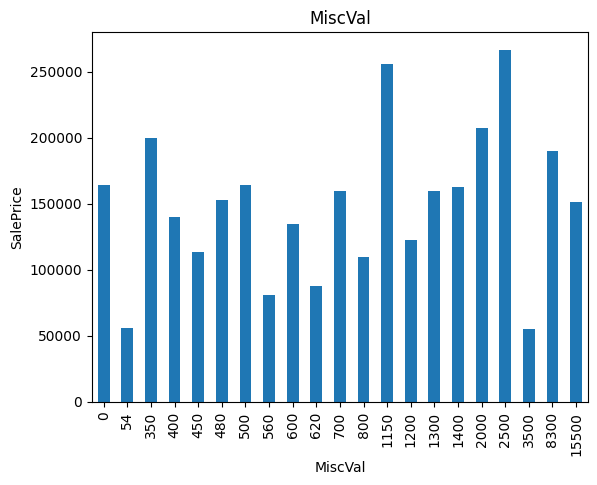

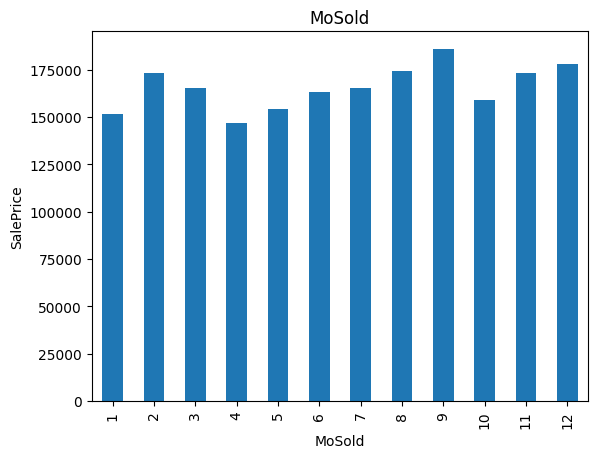

In [28]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

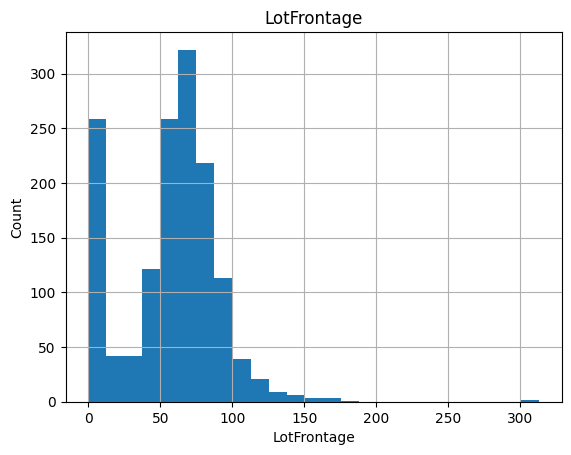

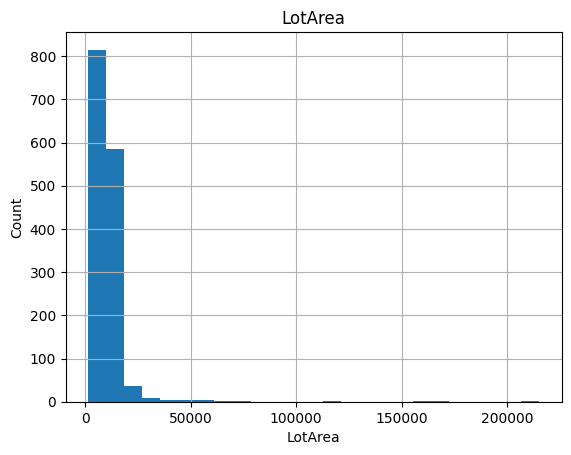

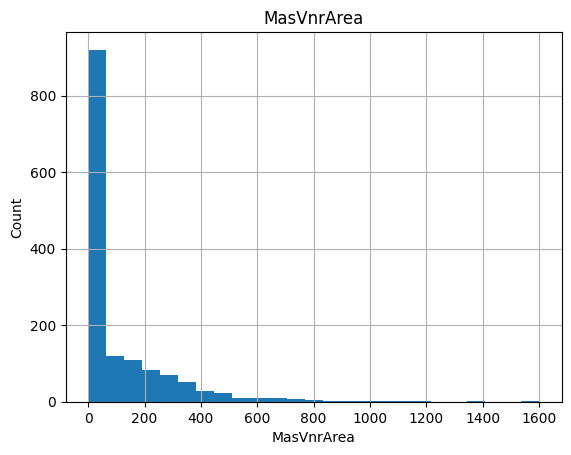

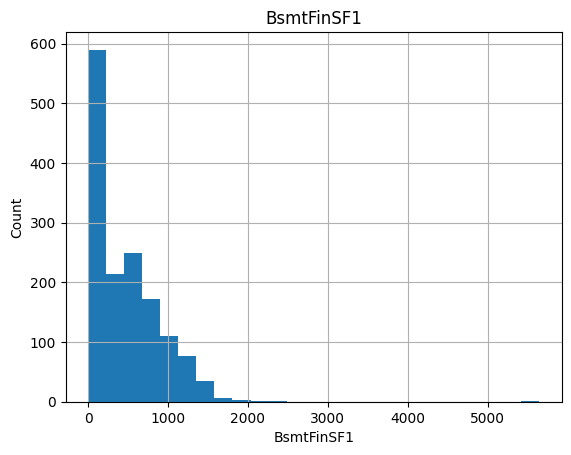

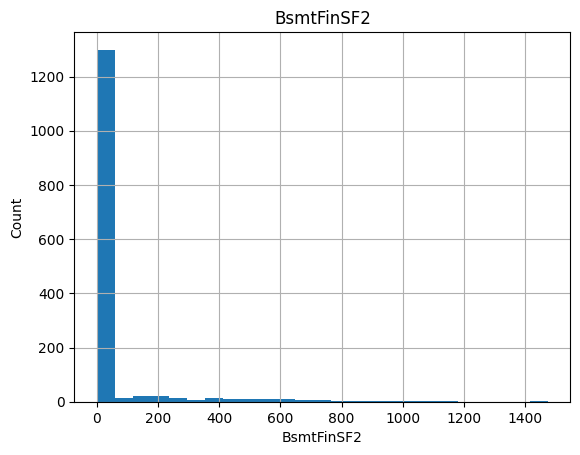

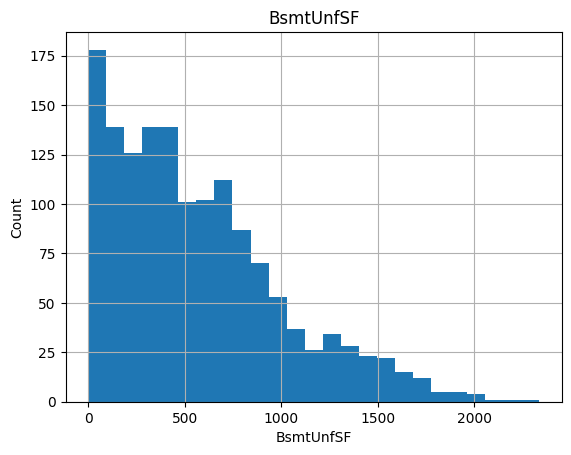

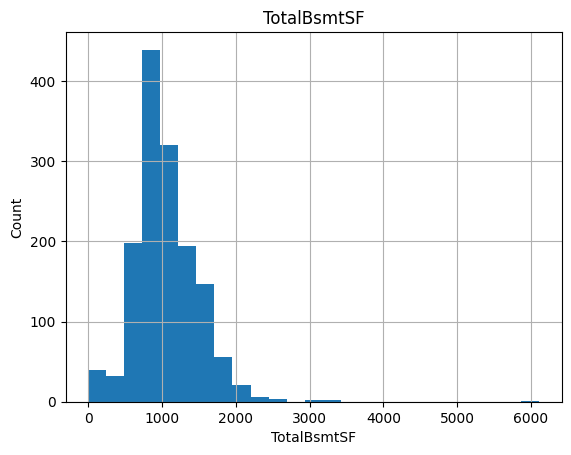

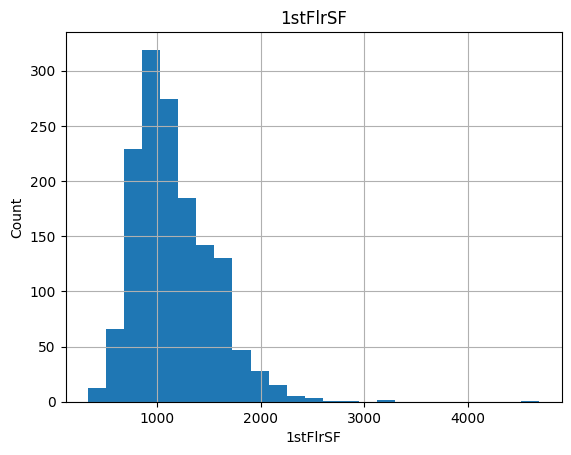

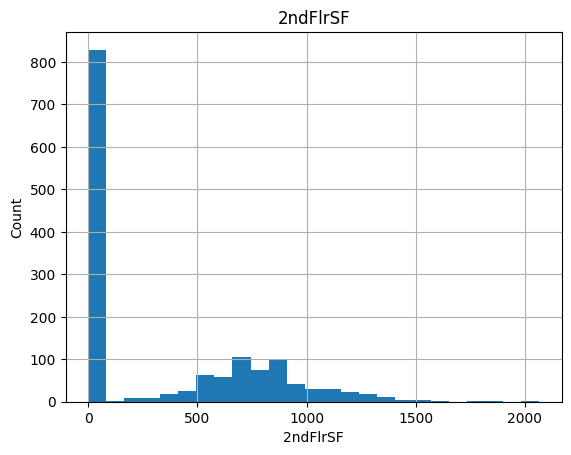

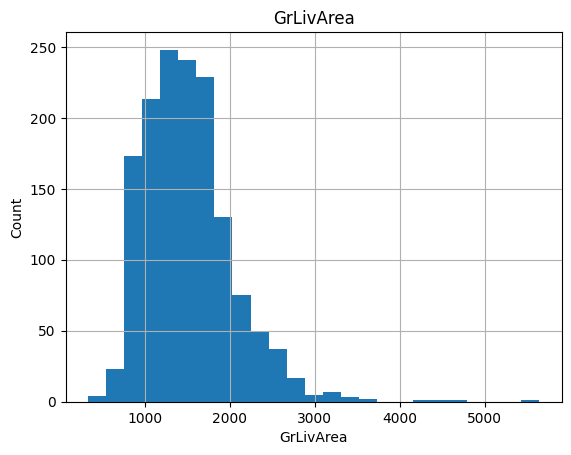

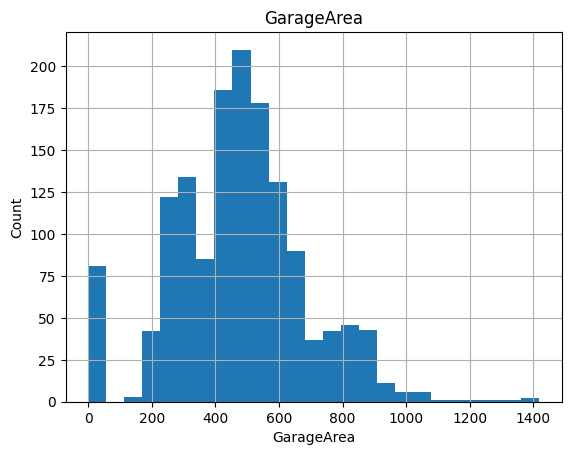

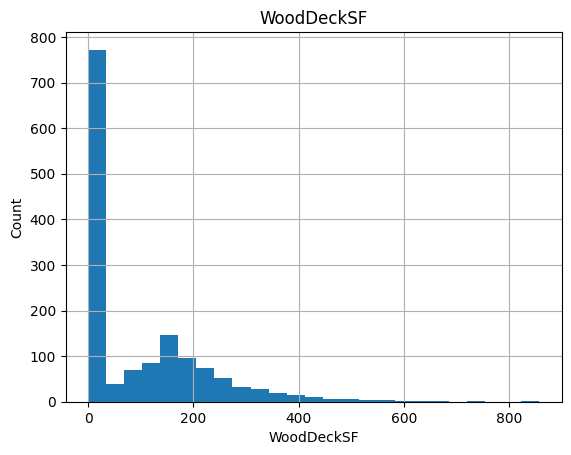

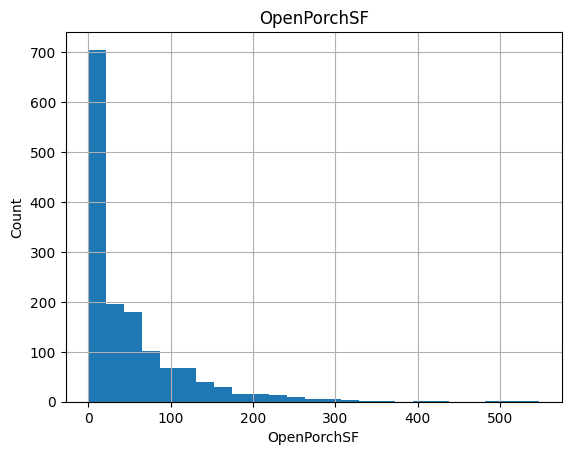

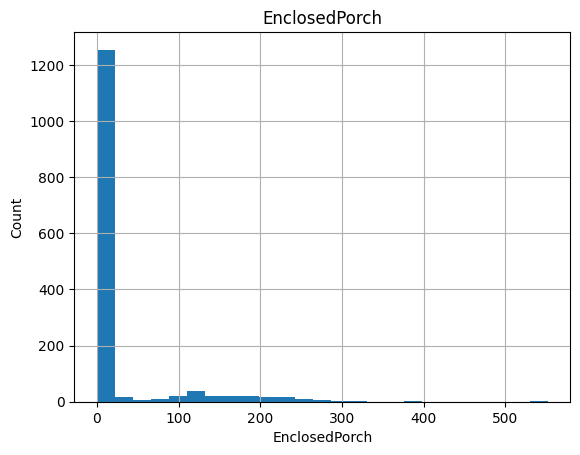

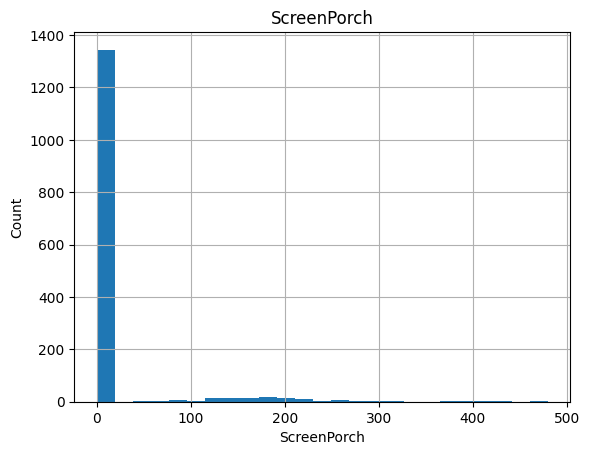

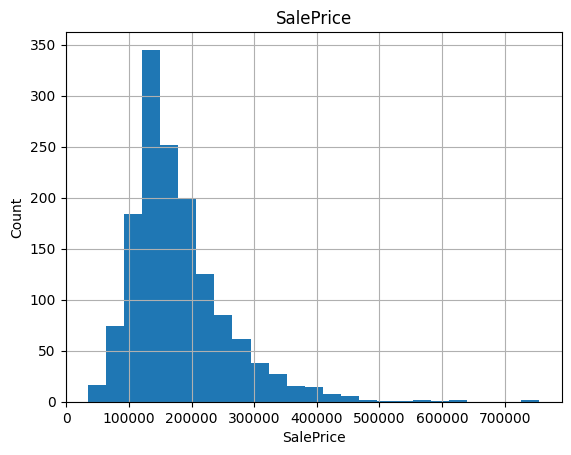

In [29]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Insights
we can see all the continuous features are having right skewed Distribution <br/>
So, We can use log normal Distribution for better accuracy

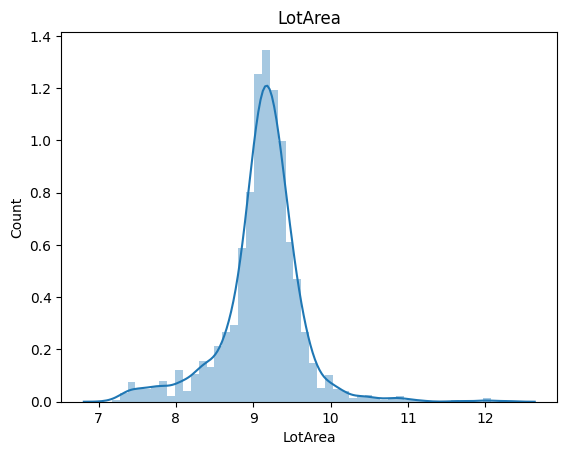

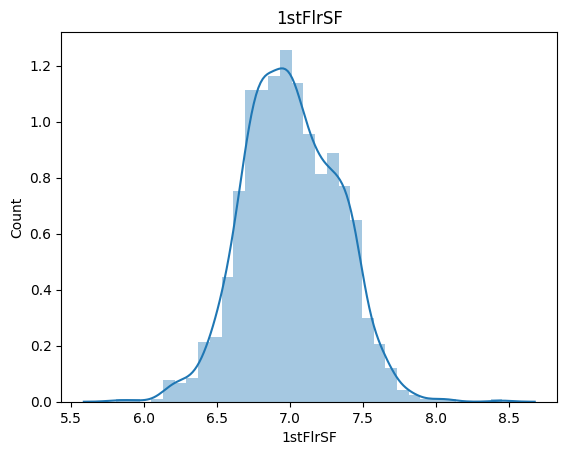

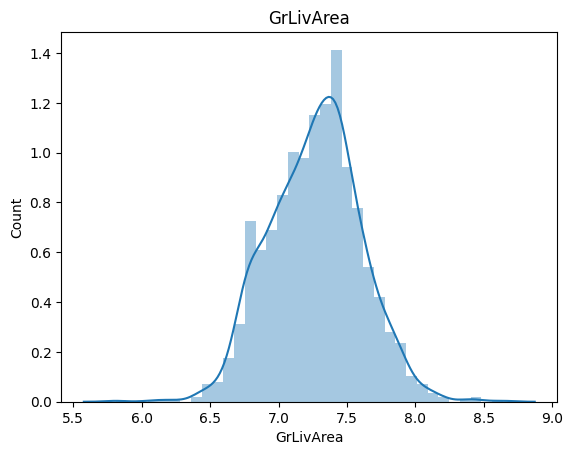

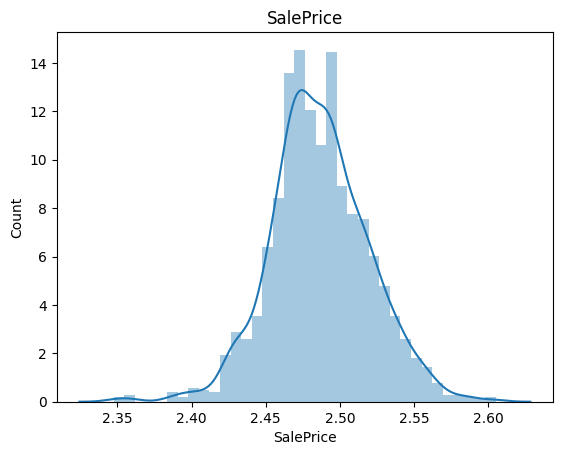

In [30]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        sns.distplot(data[feature],kde=True)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

## Insights
Now all the Continuous features are normally distributed

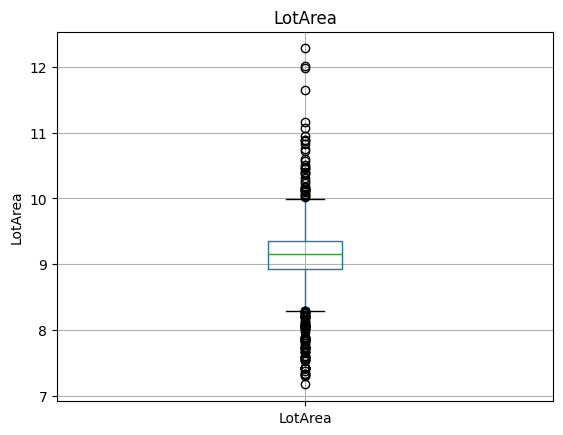

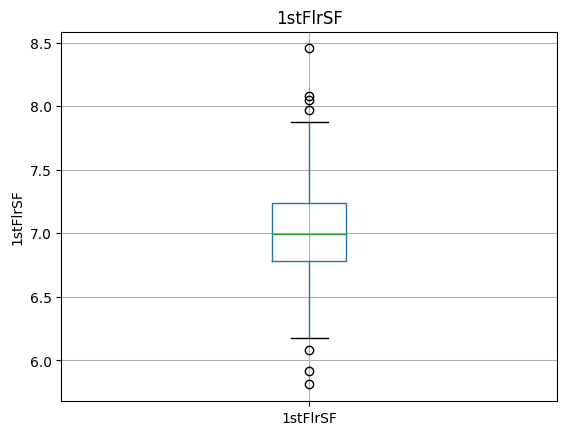

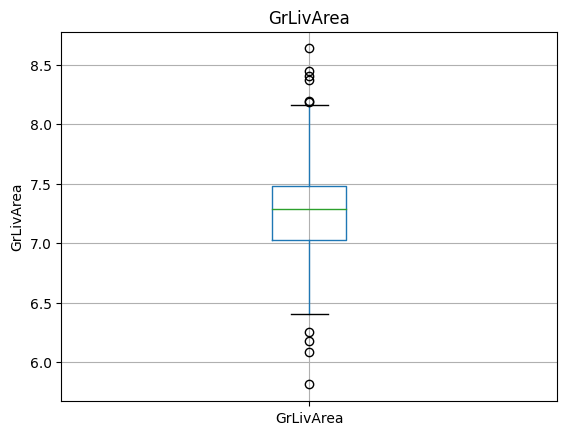

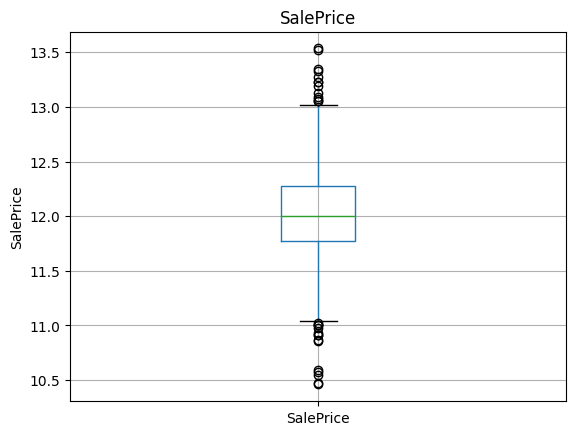

In [31]:
# Checking for Outliers
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Insights
There are so many Outliers

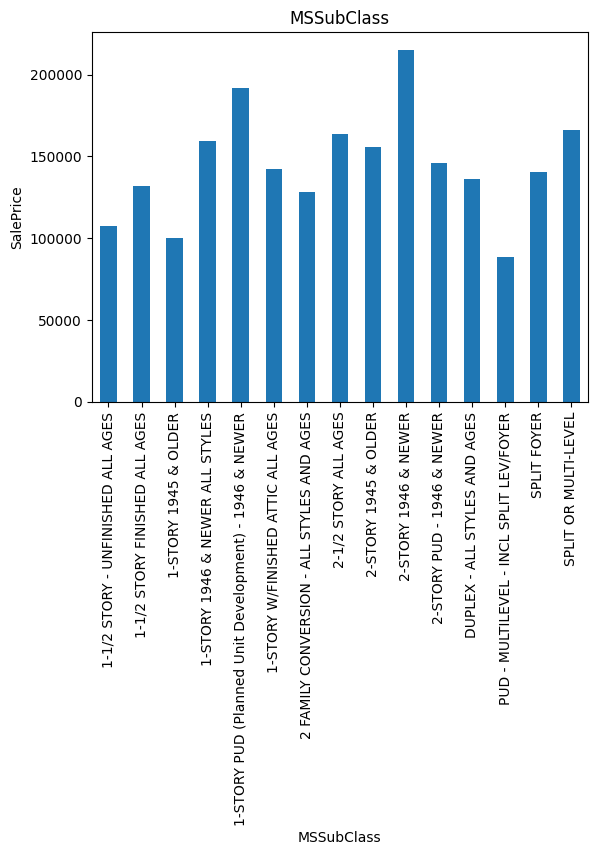

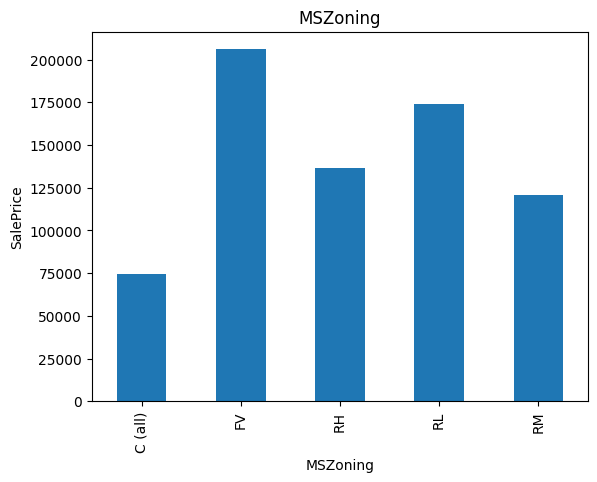

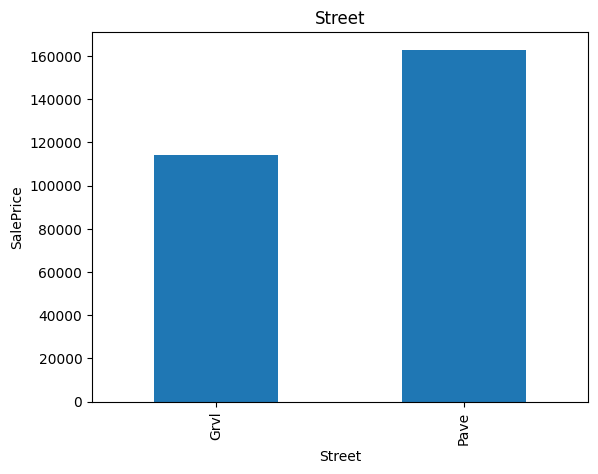

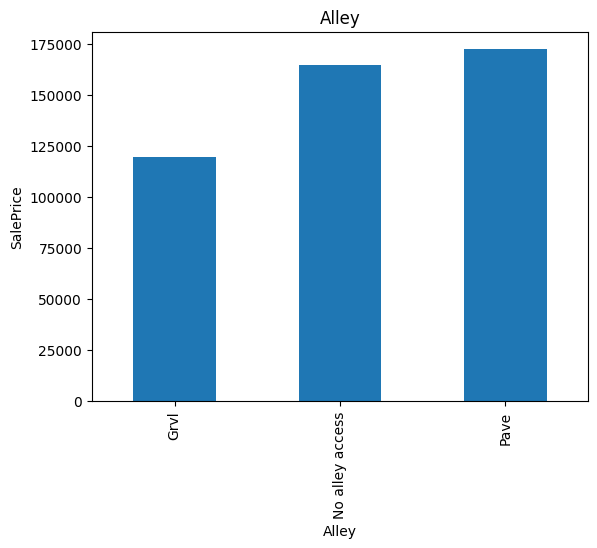

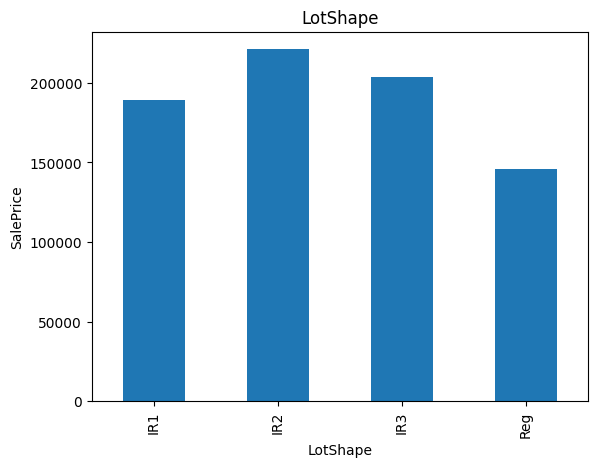

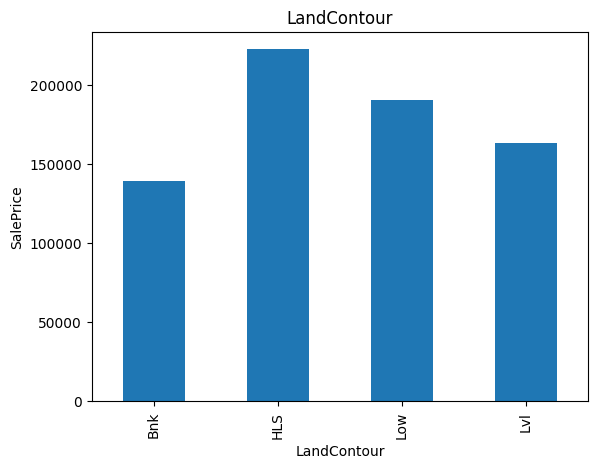

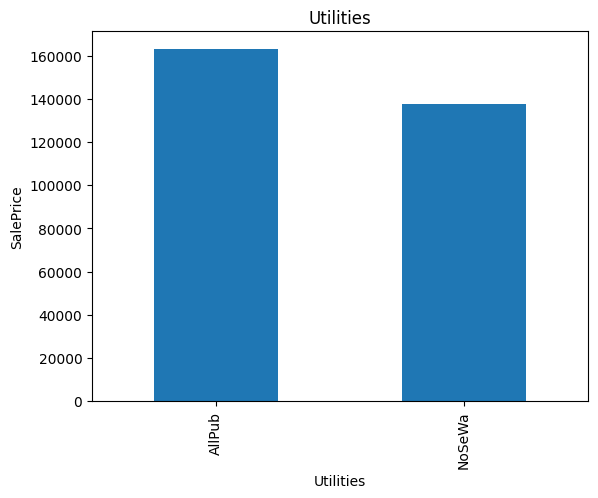

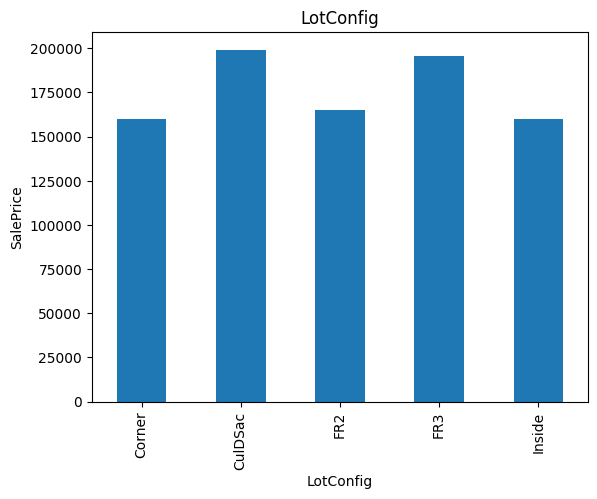

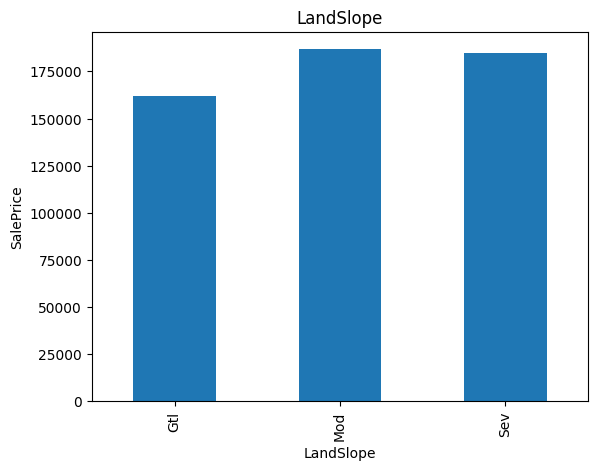

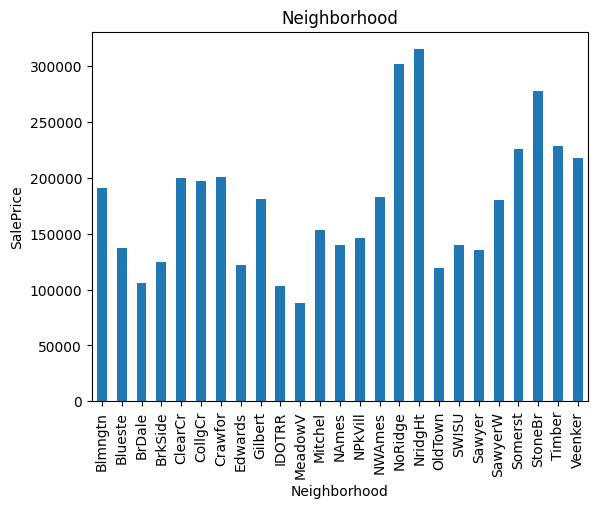

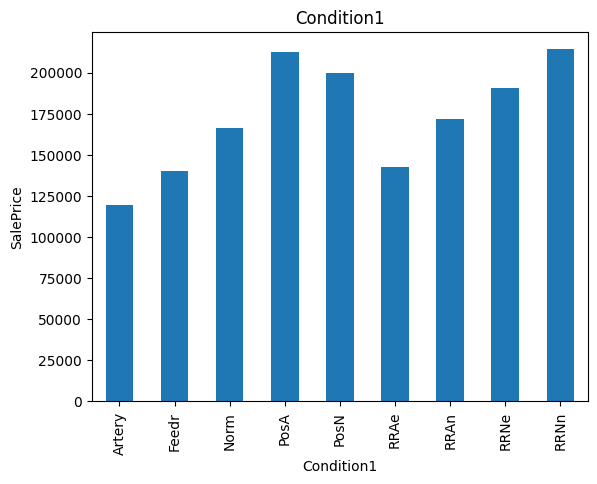

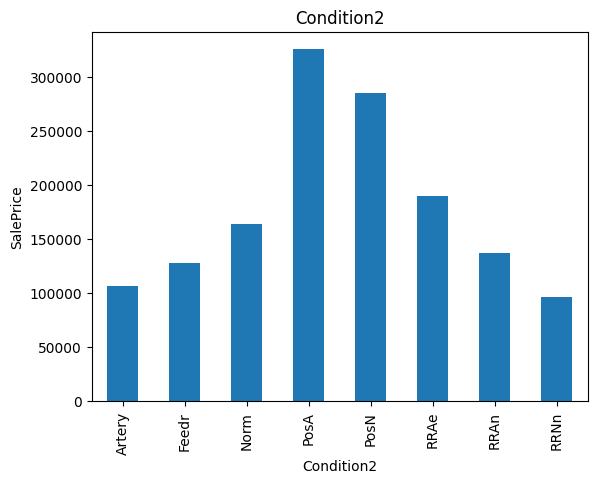

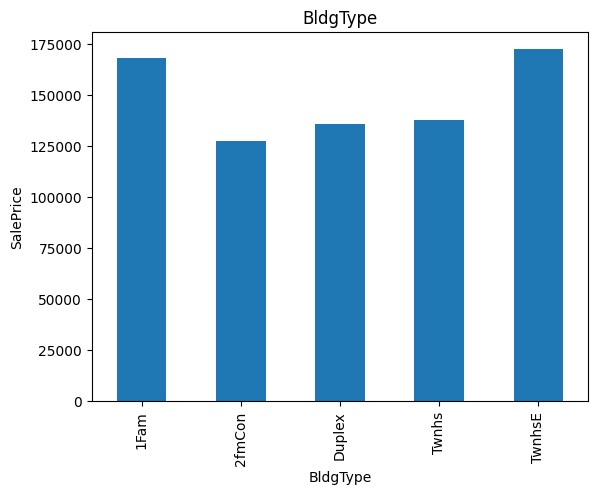

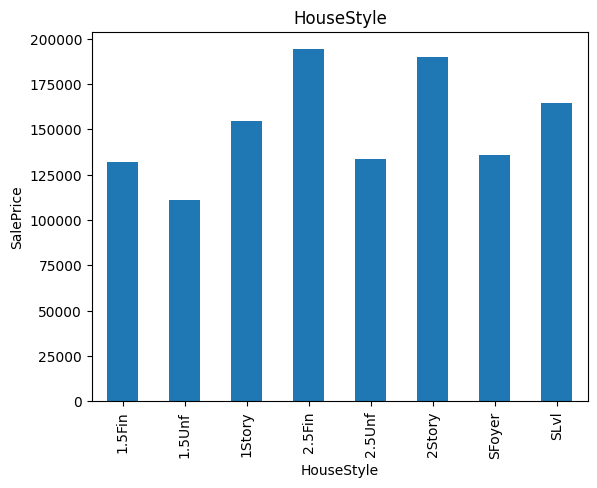

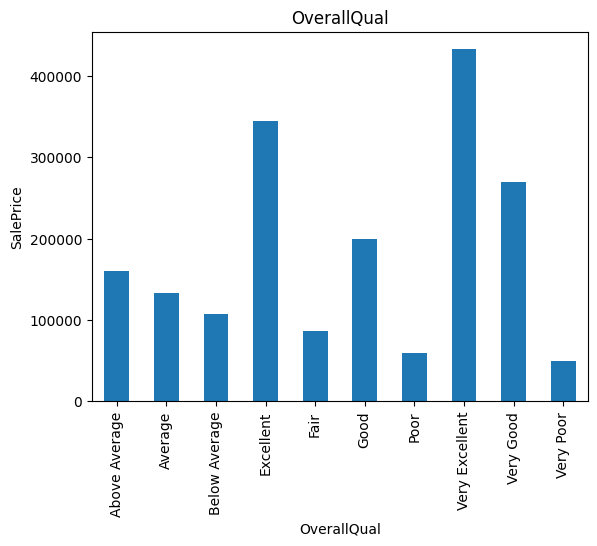

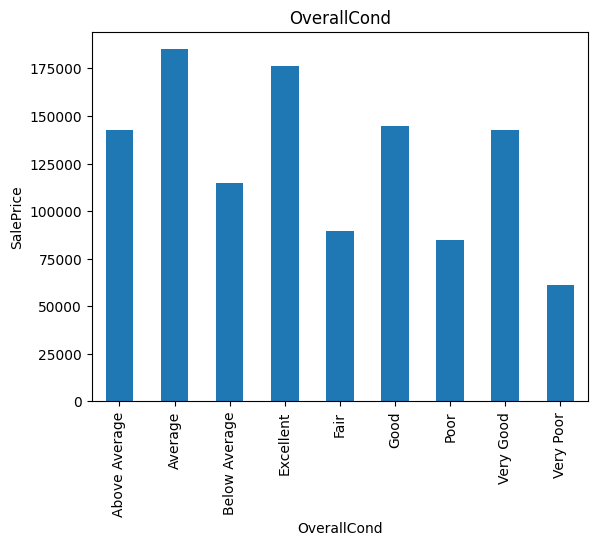

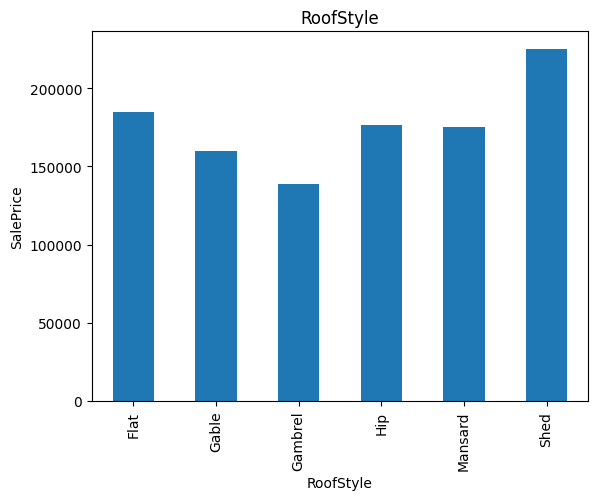

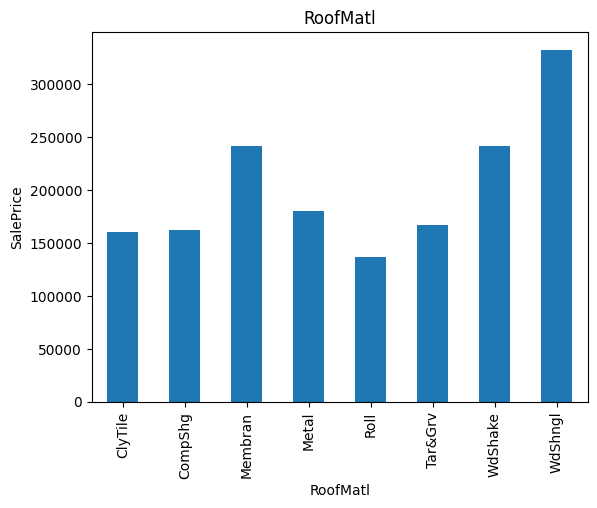

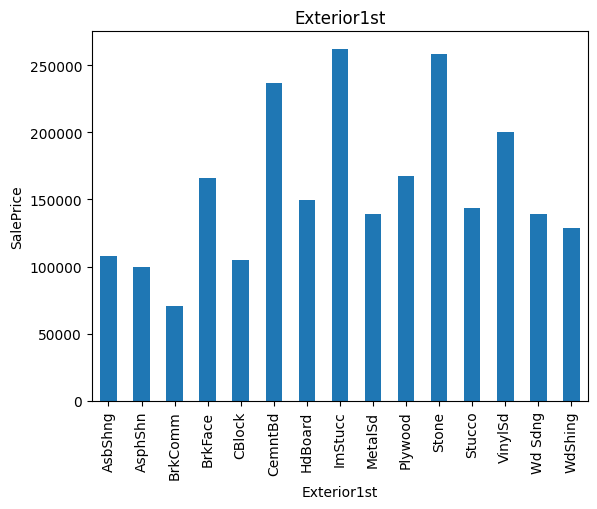

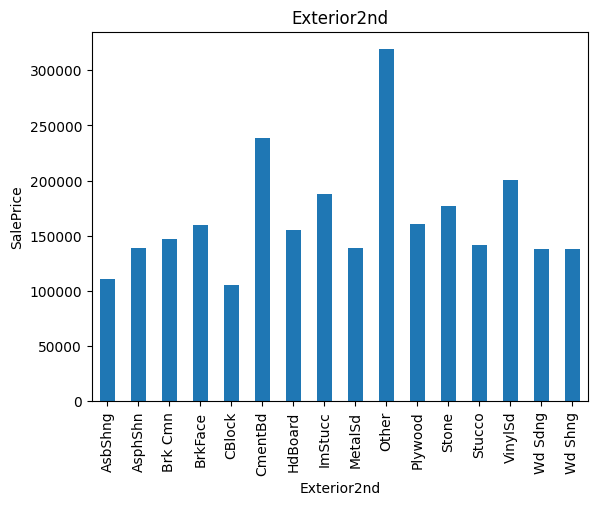

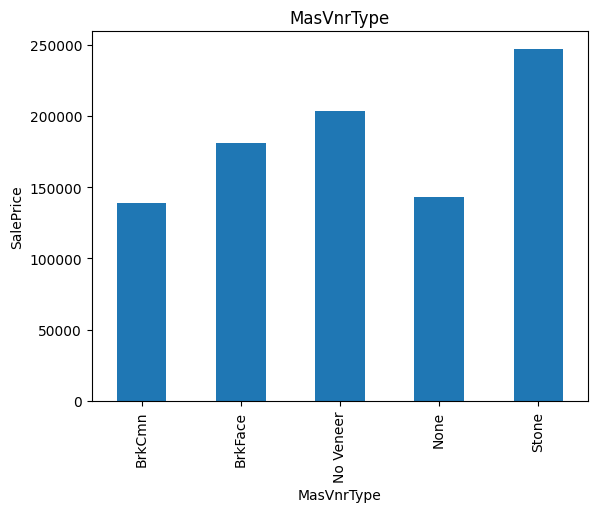

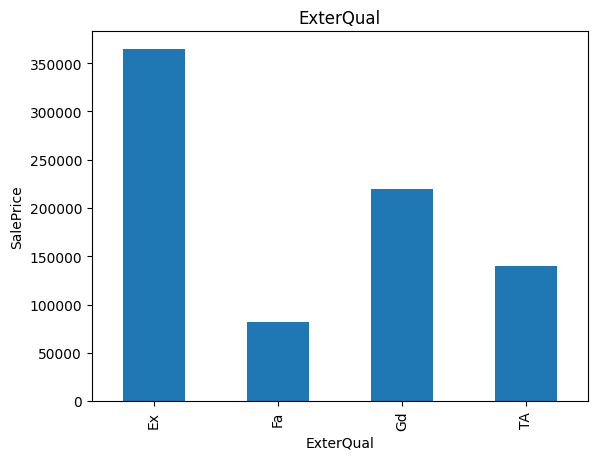

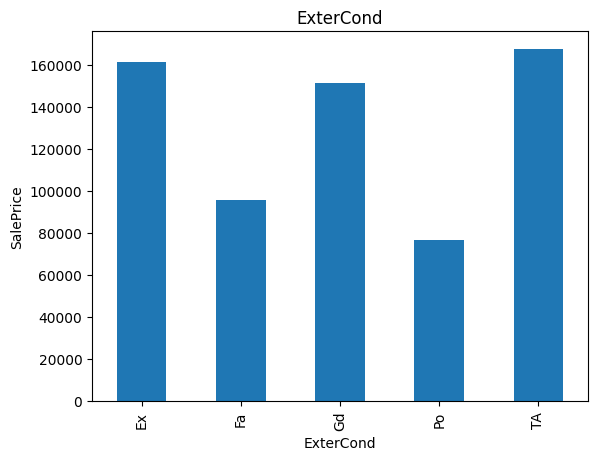

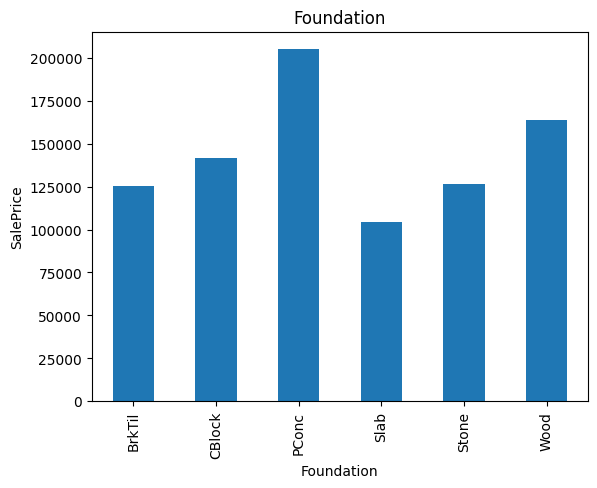

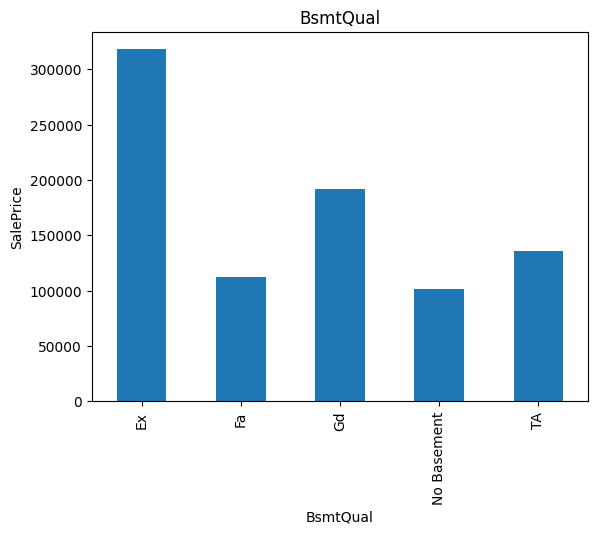

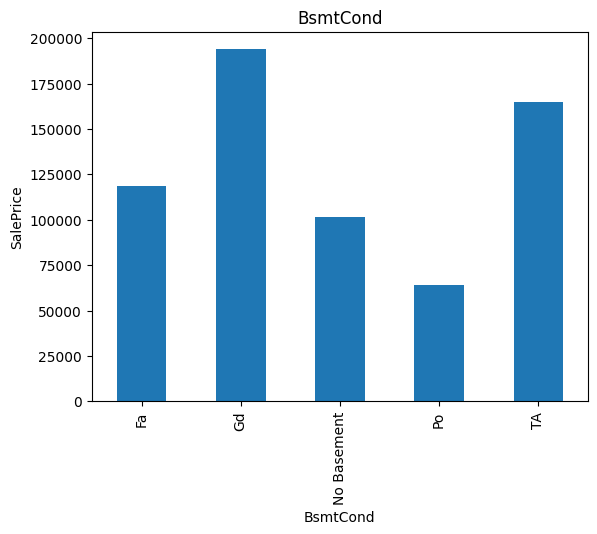

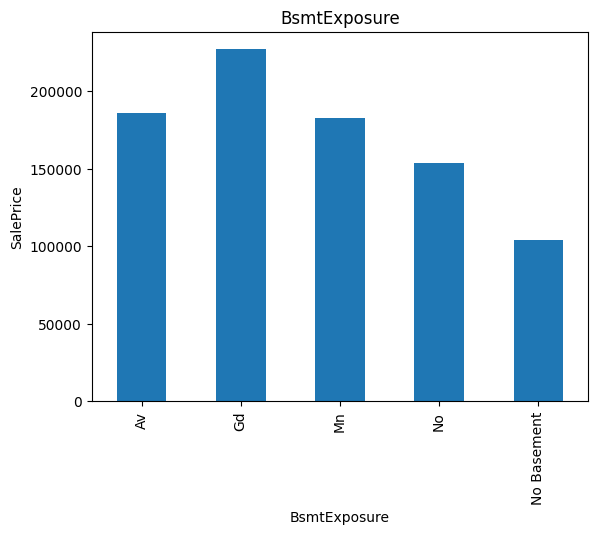

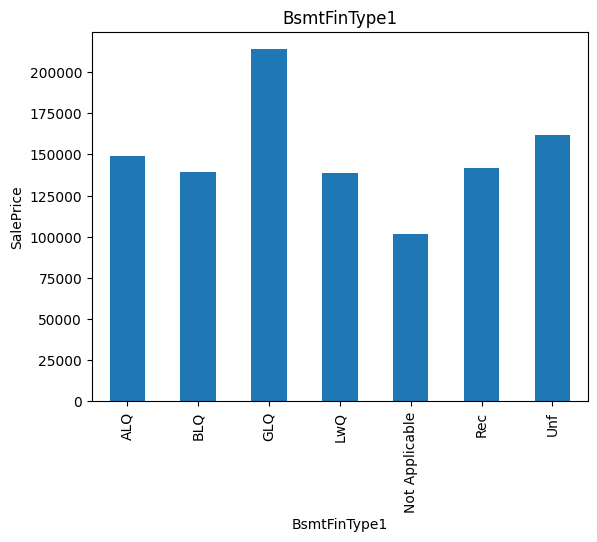

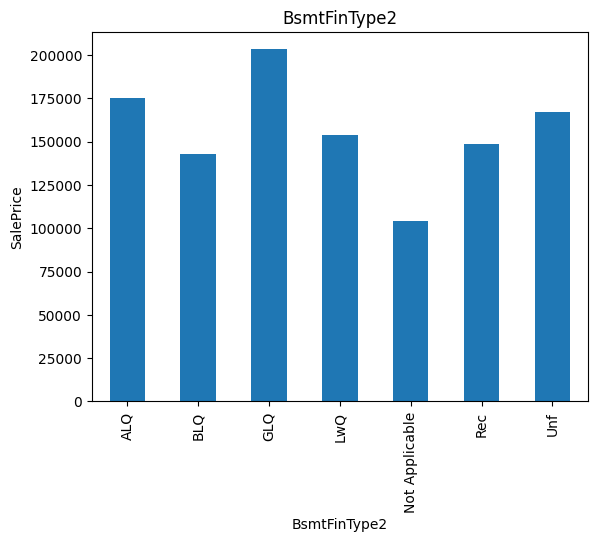

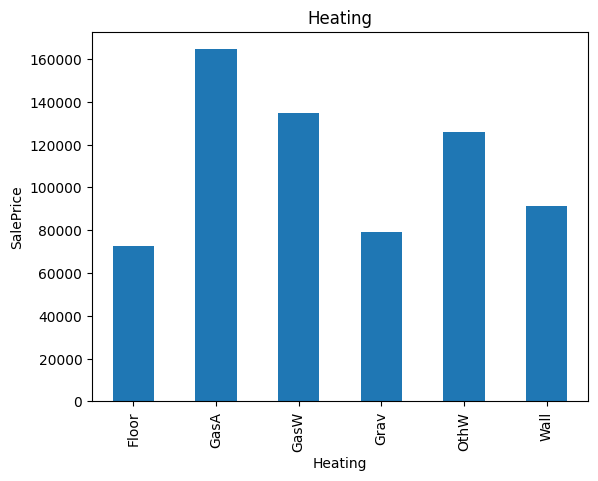

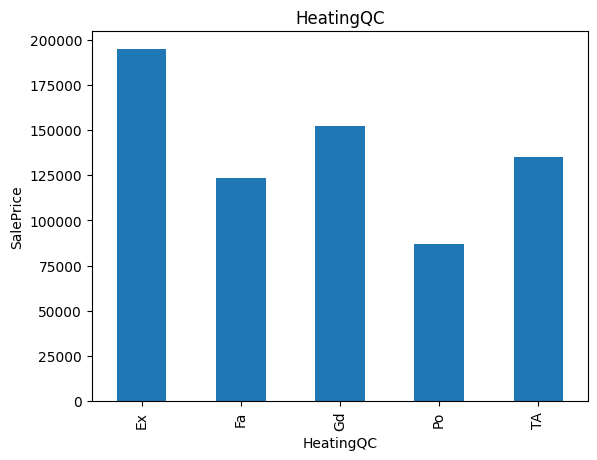

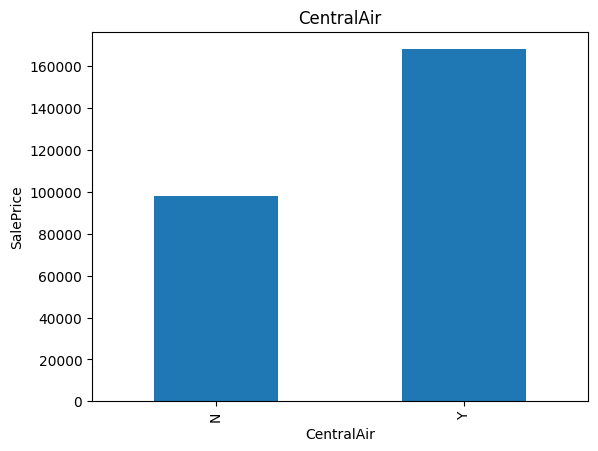

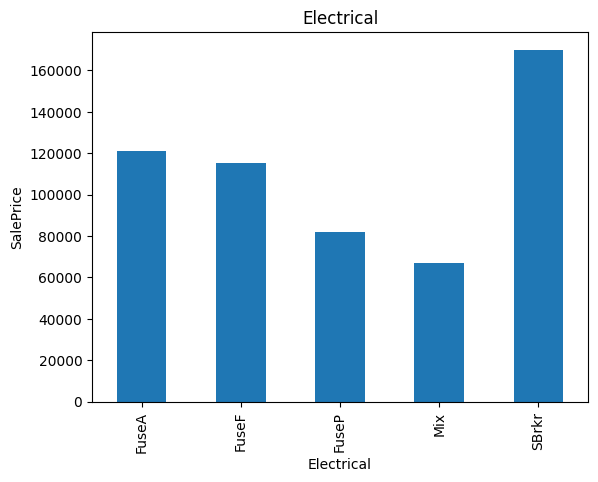

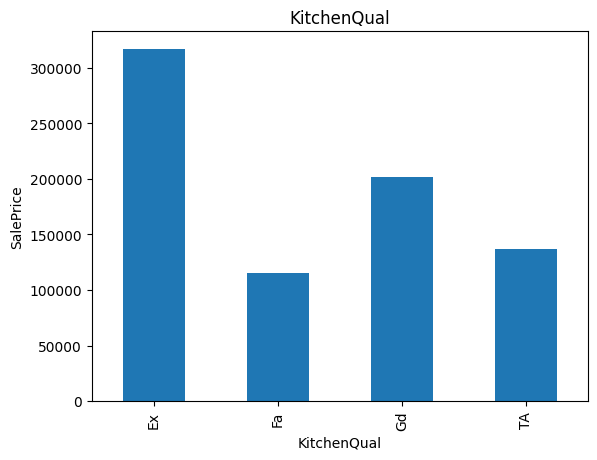

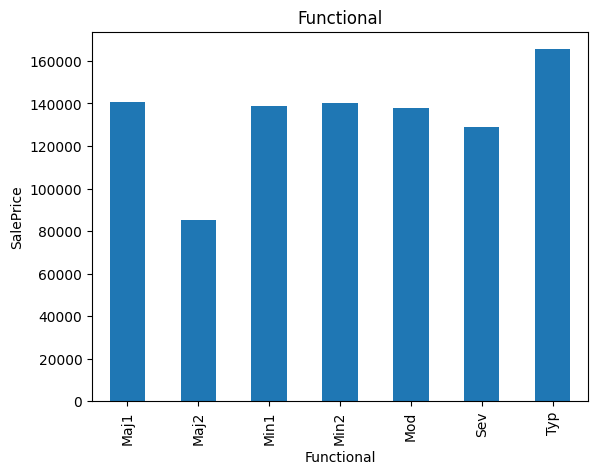

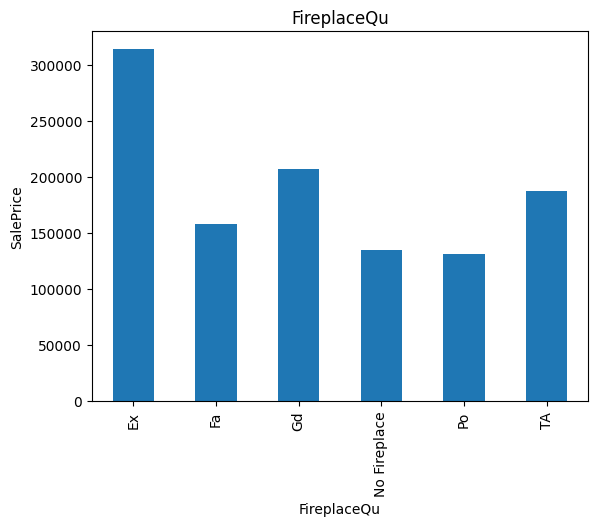

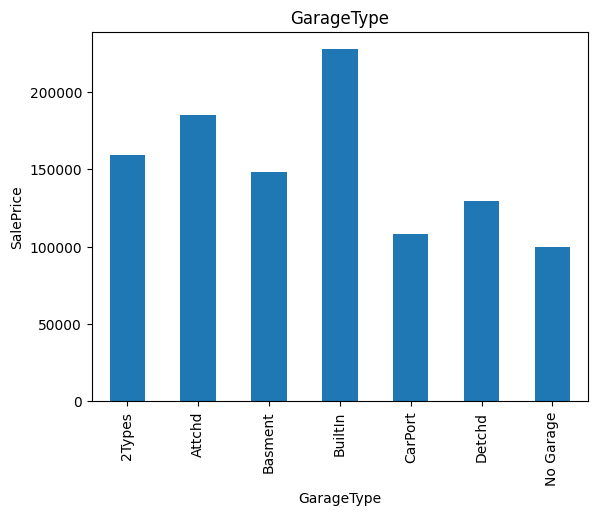

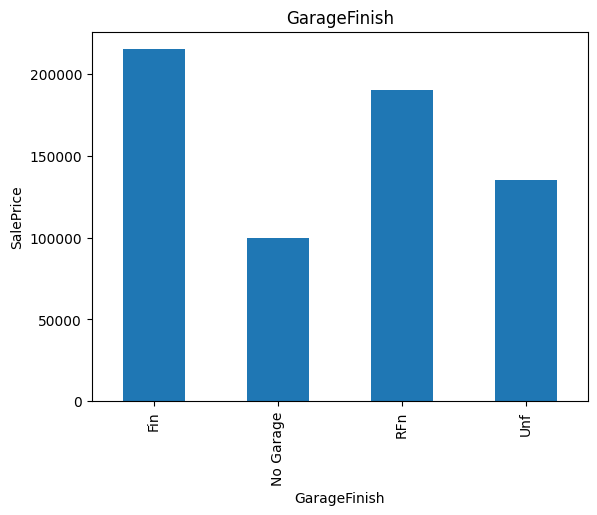

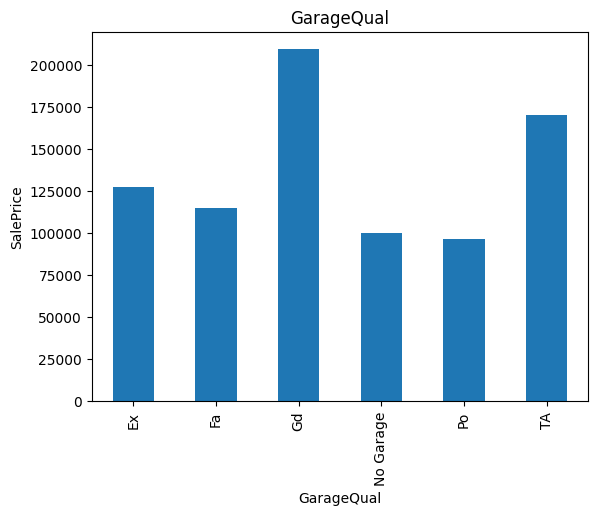

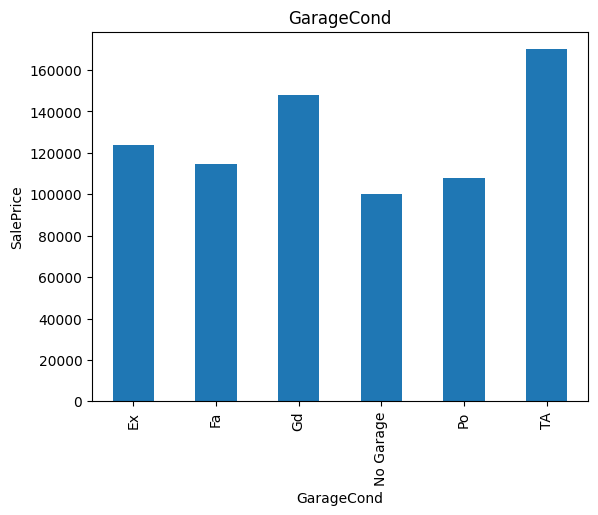

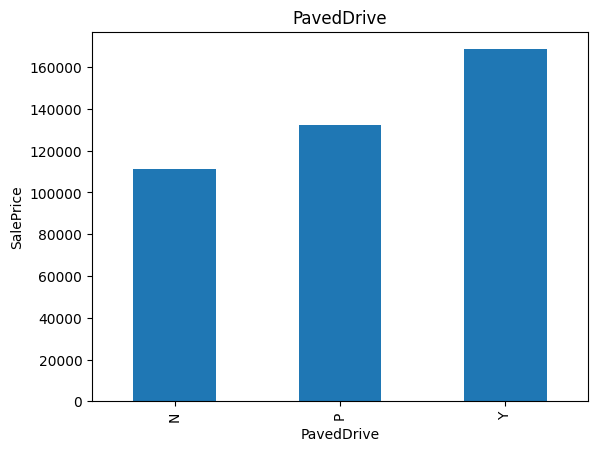

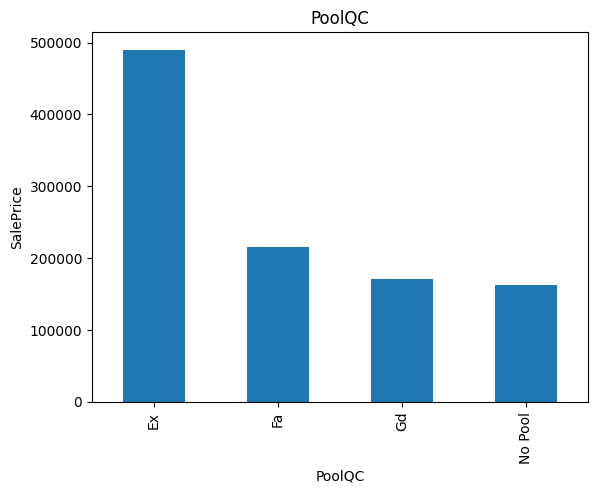

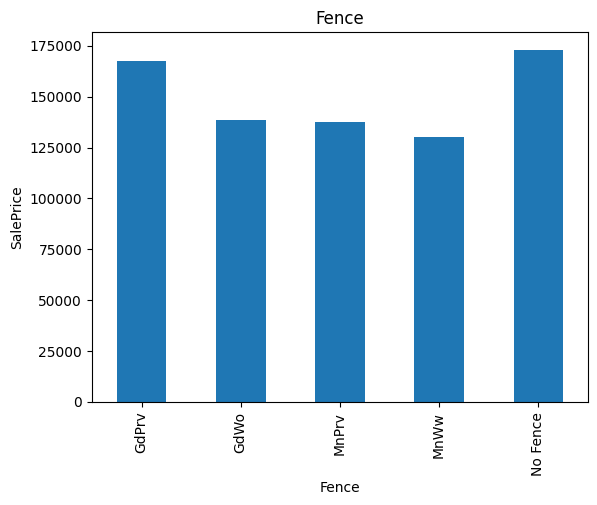

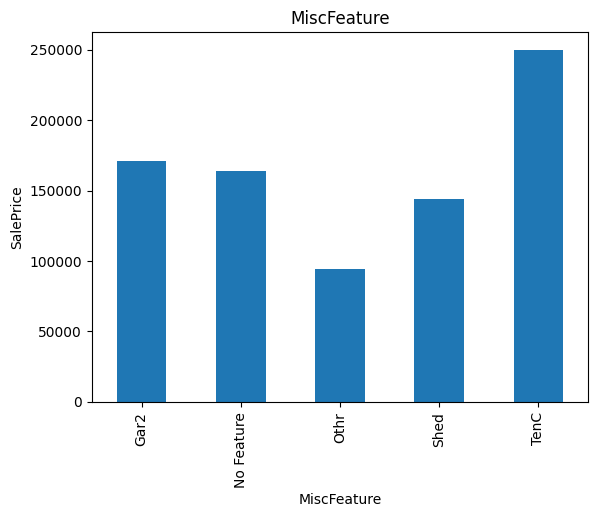

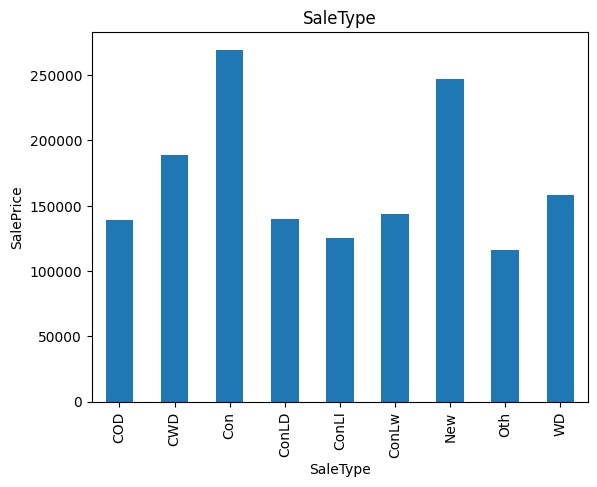

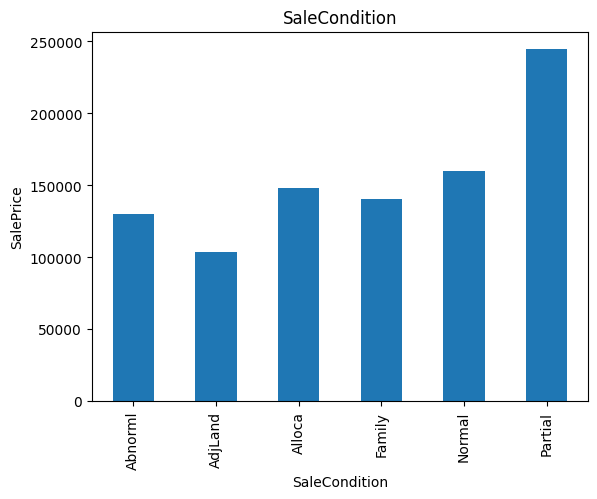

In [32]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in cat_variables:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature engineering

In [33]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
## Temporal Variables (Date Time Variables)
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[feature]=df['YrSold']-df[feature]

In [35]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [36]:
for feature in cat_variables:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [37]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,3,65.0,8450,1,2,0,1,1,...,0,0,4,3,0,2,2008,4,4,208500
1,2,11,3,80.0,9600,1,2,0,1,1,...,0,0,4,3,0,5,2007,4,4,181500
2,3,14,3,68.0,11250,1,2,1,1,1,...,0,0,4,3,0,9,2008,4,4,223500
3,4,9,3,60.0,9550,1,2,1,1,1,...,0,0,4,3,0,2,2006,4,1,140000
4,5,14,3,84.0,14260,1,2,1,1,1,...,0,0,4,3,0,12,2008,4,4,250000
5,6,6,3,85.0,14115,1,2,1,1,1,...,0,0,2,1,700,10,2009,4,4,143000
6,7,11,3,75.0,10084,1,2,0,1,1,...,0,0,4,3,0,8,2007,4,4,307000
7,8,14,3,0.0,10382,1,2,1,1,1,...,0,0,4,1,350,11,2009,4,4,200000
8,9,6,1,51.0,6120,1,2,0,1,1,...,0,0,4,3,0,4,2008,4,1,129900
9,10,3,3,50.0,7420,1,2,0,1,1,...,0,0,4,3,0,1,2008,4,4,118000


In [38]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])
df[feature_scale] = scaler.transform(df[feature_scale])

In [63]:
file = open('standardScalar.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,1.000000,0.75,0.207668,0.033420,1.0,1.0,0.000000,0.333333,1.0,...,0.0,0.0,1.0,0.75,0.0,0.090909,0.50,0.5,0.8,208500
1,2,0.785714,0.75,0.255591,0.038795,1.0,1.0,0.000000,0.333333,1.0,...,0.0,0.0,1.0,0.75,0.0,0.363636,0.25,0.5,0.8,181500
2,3,1.000000,0.75,0.217252,0.046507,1.0,1.0,0.333333,0.333333,1.0,...,0.0,0.0,1.0,0.75,0.0,0.727273,0.50,0.5,0.8,223500
3,4,0.642857,0.75,0.191693,0.038561,1.0,1.0,0.333333,0.333333,1.0,...,0.0,0.0,1.0,0.75,0.0,0.090909,0.00,0.5,0.2,140000
4,5,1.000000,0.75,0.268371,0.060576,1.0,1.0,0.333333,0.333333,1.0,...,0.0,0.0,1.0,0.75,0.0,1.000000,0.50,0.5,0.8,250000


In [41]:
X=df.drop(['Id','SalePrice'], axis=1) 
y=df['SalePrice']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=0)

In [43]:
X_train.shape, X_test.shape

((978, 79), (482, 79))

# Feature Selection

In [44]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.26303813, 0.11599324, 0.20114237, 0.16289527, 0.01458664,
       0.0110723 , 0.05093661, 0.01976616, 0.0336408 , 0.01387184,
       0.01313112, 0.51283936, 0.05219237, 0.00958739, 0.02958821,
       0.09079758, 0.54296032, 0.11547041, 0.31927083, 0.25710698,
       0.03394245, 0.        , 0.14592162, 0.14509193, 0.09831191,
       0.09607723, 0.31849252, 0.01173729, 0.18749224, 0.3011184 ,
       0.03279314, 0.04895083, 0.16638122, 0.17965844, 0.01164427,
       0.00061087, 0.11906726, 0.3928628 , 0.        , 0.16399735,
       0.05729645, 0.05256253, 0.29383726, 0.22826358, 0.        ,
       0.47924749, 0.02883532, 0.        , 0.25468482, 0.07786011,
       0.0336304 , 0.00721041, 0.30507124, 0.18290111, 0.01518921,
       0.19075388, 0.24183203, 0.21121305, 0.2096306 , 0.23994878,
       0.36254865, 0.36530029, 0.08310813, 0.07676435, 0.04491557,
       0.06479631, 0.16588514, 0.0071482 , 0.0014286 , 0.02342266,
       0.        , 0.        , 0.04090392, 0.        , 0.     

In [45]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.542960
Neighborhood    0.512839
GrLivArea       0.479247
TotalBsmtSF     0.392863
GarageArea      0.365300
                  ...   
PoolQC          0.000000
PoolArea        0.000000
Heating         0.000000
BsmtHalfBath    0.000000
RoofMatl        0.000000
Length: 79, dtype: float64

<AxesSubplot: >

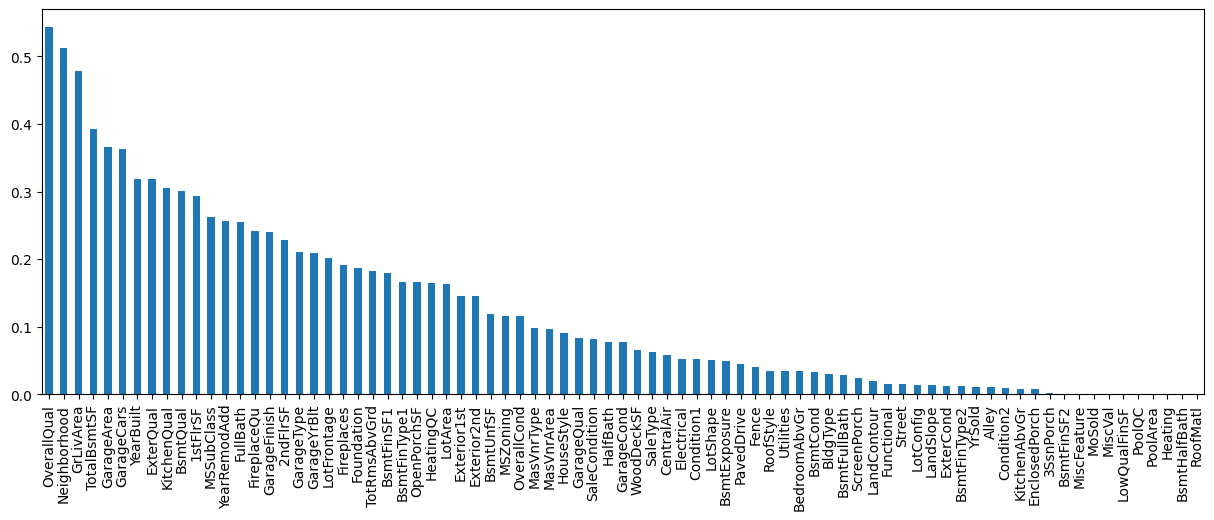

In [46]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

## Top 10 Percentile

In [47]:
# ## Selecting the top 10 percentile
# selected_top_columns = SelectPercentile(mutual_info_regression, percentile=10)
# selected_top_columns.fit(X_train.fillna(0), y_train)

In [48]:
# selected_feat = X_train.columns[selected_top_columns.get_support()]

In [49]:
# X_train=X_train[selected_feat]

In [50]:
# X_test=X_test[selected_feat]

## Top 8 important feature

In [51]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 8 important features
selected_top_columns = SelectKBest(mutual_info_regression, k=8)
selected_top_columns.fit(X_train.fillna(0), y_train)
X_train=X_train[X_train.columns[selected_top_columns.get_support()]]

In [52]:
X_test=X_test[X_test.columns[selected_top_columns.get_support()]]

In [53]:
X_train.columns,X_test.columns

(Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual', 'TotalBsmtSF',
        'GrLivArea', 'GarageCars', 'GarageArea'],
       dtype='object'),
 Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual', 'TotalBsmtSF',
        'GrLivArea', 'GarageCars', 'GarageArea'],
       dtype='object'))

### Selected features
Neighborhood: Physical locations within Ames city limits<br/>
OverallQual: Overall material and finish quality<br/>
YearBuilt: Original construction date<br/>
ExterQual: Exterior material quality<br/>
BsmtQual: Height of the basement<br/>
TotalBsmtSF: Total square feet of basement area<br/>
GrLivArea: Above grade (ground) living area square feet<br/>
GarageCars: Size of garage in car capacity<br/>

In [54]:
# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of correlated columns 
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname) 
#     return col_corr

In [55]:
# corr_features = correlation(X_train, 0.2) 
# len(set(corr_features))

In [56]:
# X_train.drop(corr_features,axis=1,inplace=True) 
# X_test.drop(corr_features,axis=1,inplace=True)

# Model Building

In [57]:
models = {
    "Simple Linear Regression" : LinearRegression(),
    "LassoCV" : LassoCV(),
    "RidgeCV" : RidgeCV(),
    "Decision Tree Regression" : DecisionTreeRegressor(),
    "Support Vector Regression" : SVR(),
    "Random Forest Regression" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "Gradient Boosting Regression" : GradientBoostingRegressor(),
    "XgBoost Regression" : XGBRegressor(),
    "K Nearest Neighbour" : KNeighborsRegressor()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)   # Train model
    
    # make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performence
    r2_train_score=r2_score(y_train,y_train_pred)
    adj_r2_train_score=1 - (1-r2_train_score)*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1)
    
    # Testing set performance
    r2_test_score=r2_score(y_test,y_test_pred)
    adj_r2_test_score=1 - (1-r2_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # Print
    print(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("R2 score:",r2_train_score)
    print("Adjusted R2 score:", adj_r2_train_score)
    
    
    print()
    
    print("Model performance for test set")
    print("R2 score:",r2_test_score)
    print("Adjusted R2 score:", adj_r2_test_score)
    
    print("--------------------------------------")

Simple Linear Regression
Model performance for Training set
R2 score: 0.8176481127597084
Adjusted R2 score: 0.8161426276225336

Model performance for test set
R2 score: 0.73140195728127
Adjusted R2 score: 0.7268590728378241
--------------------------------------
LassoCV
Model performance for Training set
R2 score: 0.8173611638947988
Adjusted R2 score: 0.8158533097267476

Model performance for test set
R2 score: 0.7386565834918789
Adjusted R2 score: 0.734236398857492
--------------------------------------
RidgeCV
Model performance for Training set
R2 score: 0.8176142608969688
Adjusted R2 score: 0.8161084962810511

Model performance for test set
R2 score: 0.7336177509327839
Adjusted R2 score: 0.7291123429147337
--------------------------------------
Decision Tree Regression
Model performance for Training set
R2 score: 0.9999257738786205
Adjusted R2 score: 0.9999251610726648

Model performance for test set
R2 score: 0.7553014528732245
Adjusted R2 score: 0.7511627882283741
----------------

In [58]:
# I have selected Gradient Boosting for better accuracy
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}
model = GradientBoostingRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
# prediction
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

In [59]:
# training set preformance
r2_train_score=r2_score(y_train,y_train_pred)
adj_r2_train_score=1 - (1-r2_train_score)*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1)

# Testing set performance
r2_test_score=r2_score(y_test,y_test_pred)
adj_r2_test_score=1 - (1-r2_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [60]:
print("Model performance for Training set")
print("R2 score:",r2_train_score)
print("Adjusted R2 score:", adj_r2_train_score)

print()

print("Model performance for test set")
print("R2 score:",r2_test_score)
print("Adjusted R2 score:", adj_r2_test_score)

Model performance for Training set
R2 score: 0.9423180071033745
Adjusted R2 score: 0.9418417883797698

Model performance for test set
R2 score: 0.8719901864332866
Adjusted R2 score: 0.8698251155907206


In [61]:
file = open('Models/ModelForTesting.pkl','wb')
pickle.dump(grid_search,file)
file.close()